In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df= pd.read_csv("Digital_MusicFinal1.csv")
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
0,0,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,2013-12-22,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.446,0.554,0.9545,2013,12,22
1,1,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,2013-09-11,AC2PL52NKPL29,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.652,0.348,0.8927,2013,9,11
2,2,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,2013-03-02,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.909,0.091,0.6808,2013,3,2
3,3,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,2012-12-02,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.664,0.336,0.8442,2012,12,2
4,4,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,2012-01-07,A12R54MKO17TW0,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.03,0.701,0.269,0.8807,2012,1,7


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Class                 0
asin                  0
reviewText          315
reviewerName          2
overall               0
unixReviewTime        0
reviewTime            0
reviewerID            0
title               719
price                 0
brand             18726
Sentiment             0
neg                   0
neu                   0
pos                   0
compound              0
year                  0
month                 0
day                   0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0          int64
Class              object
asin               object
reviewText         object
reviewerName       object
overall           float64
unixReviewTime    float64
reviewTime         object
reviewerID         object
title              object
price             float64
brand              object
Sentiment          object
neg               float64
neu               float64
pos               float64
compound          float64
year                int64
month               int64
day                 int64
dtype: object

In [ ]:
df['brand'] = df['brand'].fillna('unknown')
df.dropna(inplace = True)

In [ ]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
mode = df['reviewText'].mode()[0]
df['reviewText'].fillna(mode, inplace=True)

In [ ]:
mode1= df['reviewerName'].mode()[0]
df['reviewerName'].fillna(mode, inplace=True)

In [ ]:
mode2 = df['title'].mode()[0]
df['title'].fillna(mode, inplace=True)

In [ ]:
df.isnull().sum()

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
day               0
dtype: int64

In [ ]:
df1 = df[['price','compound']]

In [ ]:
s= MinMaxScaler()

In [ ]:
df1['reviewTime'] = s.fit_transform(np.array(df1['reviewTime']).reshape(-1,1))



KeyError: ignored

In [ ]:
wcss_list= [] 

for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df1)  
    wcss_list.append(kmeans.inertia_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

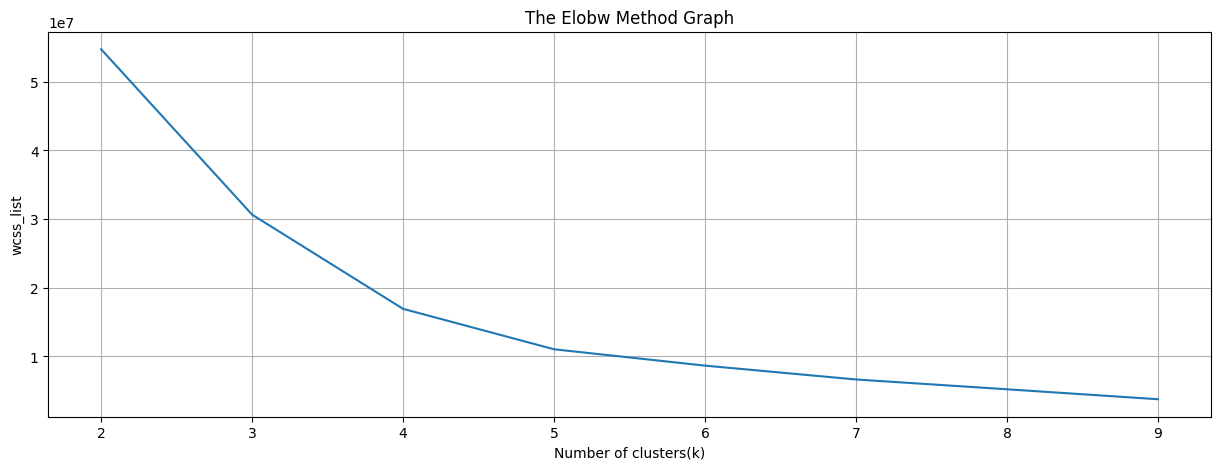

In [ ]:
plt.figure(figsize = (15, 5)) 
plt.plot(range(2, 10), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.grid(True);

In [ ]:
df1.values

array([[13.01  ,  0.9545],
       [13.01  ,  0.8927],
       [13.01  ,  0.6808],
       ...,
       [79.98  ,  0.765 ],
       [79.98  ,  0.4927],
       [13.47  ,  0.9334]])

In [ ]:
df2= df1.values

In [ ]:
model1 = KMeans(n_clusters = 4, random_state = 10).fit(df2)
pred = model1.fit_predict(df2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
c_centre = model1.cluster_centers_
c_centre

array([[6.23275064e+01, 6.20702126e-01],
       [1.94035116e+02, 6.15439705e-01],
       [6.23580238e+02, 6.82839286e-01],
       [1.34545940e+01, 6.22942475e-01]])

In [ ]:
k_label = model1.labels_
k_label

array([3, 3, 3, ..., 0, 0, 3], dtype=int32)

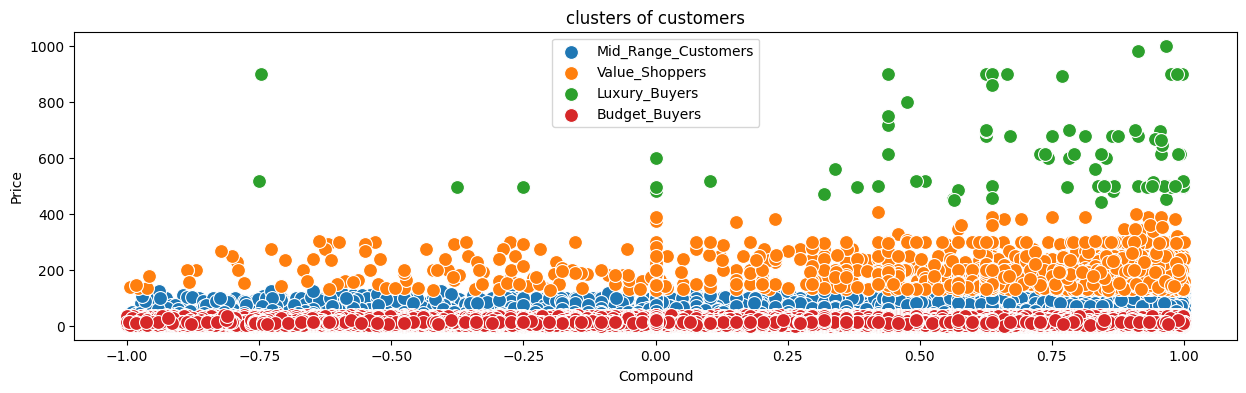

In [ ]:
plt.figure(figsize=(15,4))
sns.scatterplot(y=df2[pred==0,0] ,x=df2[pred==0,1] ,s=100,label="Mid_Range_Customers")
sns.scatterplot(y=df2[pred==1,0] ,x=df2[pred==1,1],s=100, label="Value_Shoppers")
sns.scatterplot(y=df2[pred==2,0] ,x=df2[pred==2,1] ,s=100,label="Luxury_Buyers")
sns.scatterplot(y=df2[pred==3,0] ,x=df2[pred==3,1],s=100,label="Budget_Buyers")
#sns.scatterplot(x=df2[pred==4,0] ,y=df2[pred==4,1],s=100,label="tert_target")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Compound")
plt.ylabel("Price")
plt.show()